In [1]:
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/video_emotion_sample.csv')

In [3]:
video_id = df['video_id'][4]
video_path = f'../data/video_data/{video_id}.mp4'

cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
max_sec = total_frames / fps

print(f'fps: {fps} 総フレーム数: {total_frames} 動画時間: {max_sec}')

width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

print(f'width: {width} height: {height}')

fps: 25.016110110540144 総フレーム数: 1514.0 動画時間: 60.521
width: 1280.0 height: 720.0


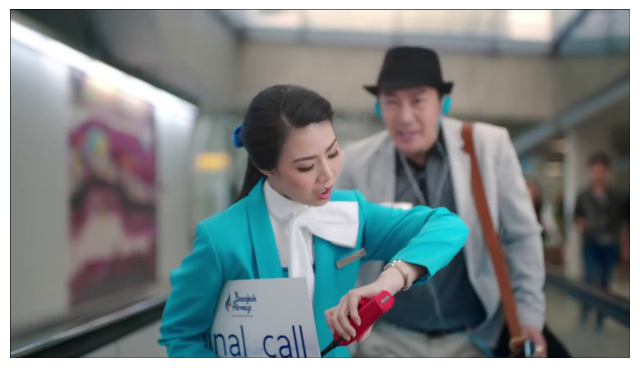

In [4]:
# 5フレーム目を取得
cap.set(cv2.CAP_PROP_POS_FRAMES, 5)
ret, frame = cap.read()

# matplotlibで表示
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
img = Image.fromarray(img)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.axis("off")
plt.show()

In [5]:
class VideoReader:
    def __init__(self, video_path):
        self.cap = cv2.VideoCapture(video_path)
        self.fps = self.cap.get(cv2.CAP_PROP_FPS)

    def read_frame(self, sec):
        num_frame = int(sec * self.fps) - 1
        self.cap.set(cv2.CAP_PROP_POS_FRAMES, num_frame)
        _, frame = self.cap.read()
        return frame

    def __del__(self):
        self.cap.release()

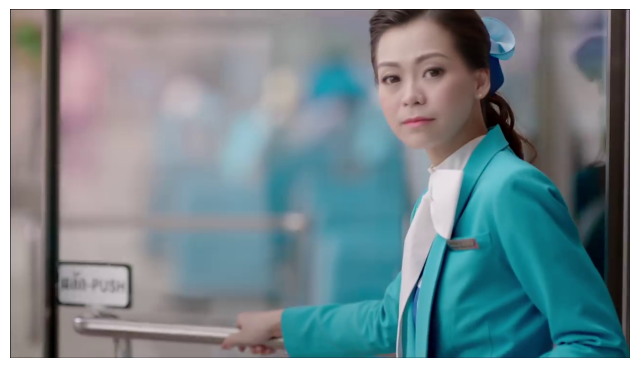

In [6]:
# 5秒目を取得
reader = VideoReader(video_path)
frame = reader.read_frame(5)
# matplotlibで表示
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
img = Image.fromarray(img)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.axis("off")
plt.show()